In [2]:
!unzip 'Mental Health in Tech Survey.zip'


Archive:  Mental Health in Tech Survey.zip
  inflating: Mental Health in Tech Survey/survey.csv  


In [1]:
import pandas as pd

df = pd.read_csv('/content/survey.csv')
df.head = df.head()
df.info = df.info()
df.describe = df.describe()
df.info, df.head, df.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

(None,
              Timestamp  Age  Gender         Country state self_employed  \
 0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
 1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
 2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
 3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
 4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   
 
   family_history treatment work_interfere    no_employees  ...  \
 0             No       Yes          Often            6-25  ...   
 1             No        No         Rarely  More than 1000  ...   
 2             No        No         Rarely            6-25  ...   
 3            Yes       Yes          Often          26-100  ...   
 4             No        No          Never         100-500  ...   
 
                 leave mental_health_consequence phys_health_consequence  \
 0       Somewhat easy                        No       

Some of rows consist of ivalid Age value,many rows with comments are null but we can just drop this column, work_interfere is a subject for inputing.

In [2]:
df = df.drop('comments', axis=1)
df['work_interfere'] = df['work_interfere'].fillna('Other')

What is the distribution of mental health conditions among different age groups in the tech industry?

In [5]:
df_age = df[(df['Age'] >= 16) & (df['Age'] <= 100)]
df_age.info()
df_age.head()
df_age.describe()
#dropping only in the copy table cause age is rellevant only for first question

<class 'pandas.core.frame.DataFrame'>
Index: 1251 entries, 0 to 1258
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1251 non-null   object
 1   Age                        1251 non-null   int64 
 2   Gender                     1251 non-null   object
 3   Country                    1251 non-null   object
 4   state                      738 non-null    object
 5   self_employed              1233 non-null   object
 6   family_history             1251 non-null   object
 7   treatment                  1251 non-null   object
 8   work_interfere             1251 non-null   object
 9   no_employees               1251 non-null   object
 10  remote_work                1251 non-null   object
 11  tech_company               1251 non-null   object
 12  benefits                   1251 non-null   object
 13  care_options               1251 non-null   object
 14  wellness_prog

,Age
count,1251.000000
mean,32.076739
std,7.288272
min,18.000000
25%,27.000000
50%,31.000000
75%,36.000000
max,72.000000


In [6]:
df_tech = df_age[(df_age['tech_company'] == 'Yes') & (df_age['treatment'] == 'Yes')]
print(df_tech.head())


              Timestamp  Age  Gender         Country state self_employed  \
0   2014-08-27 11:29:31   37  Female   United States    IL           NaN   
3   2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
6   2014-08-27 11:31:50   35  Female   United States    MI           NaN   
8   2014-08-27 11:32:39   42  Female   United States    IL           NaN   
10  2014-08-27 11:32:44   31    Male   United States    OH           NaN   

   family_history treatment work_interfere no_employees  ...   anonymity  \
0              No       Yes          Often         6-25  ...         Yes   
3             Yes       Yes          Often       26-100  ...          No   
6             Yes       Yes      Sometimes          1-5  ...          No   
8             Yes       Yes      Sometimes      100-500  ...          No   
10             No       Yes      Sometimes         6-25  ...  Don't know   

                 leave mental_health_consequence phys_health_consequence  \
0        S

In [7]:
age_bins = [17, 25, 30, 39, 49, 59, 73]
age_labels = ['<25', '25-30', '31-39', '41-49', '51-59', '60-72']
df_tech['age_group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=True)
age_g_c = df_tech['age_group'].value_counts()
print(age_g_c)
# print(df[['Age', 'age_group']].head())

age_group
31-39    196
25-30    144
<25       86
41-49     69
51-59     13
60-72      2
Name: count, dtype: int64


<ipython-input-7-512ae6531827>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tech['age_group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=True)


Group with most prevalent mental health issues is 31-39yo, least is 60-72

How does the frequency of mental health issues vary by gender?


In [13]:
gender_map = {
    'male': 'Male',
    'm': 'Male',
    'Male(cis)': 'Male',
    'female': 'Female',
    'f': 'Female',
    'woman': 'Female',
    'female(cis)': 'Female'
}
df['Gender'] = df['Gender'].str.lower().map(gender_map).fillna(df['Gender'])
genders = df['Gender'].value_counts()
print(genders)


Gender
Male                                              971
Female                                            240
Make                                                4
Male                                                3
Female (trans)                                      2
Female                                              2
Man                                                 2
Cis Male                                            2
Trans woman                                         1
msle                                                1
Neuter                                              1
queer                                               1
Guy (-ish) ^_^                                      1
Female (cis)                                        1
Mail                                                1
cis male                                            1
A little about you                                  1
Malr                                                1
p                    

In [14]:
treatment_df = df[df['treatment'] == 'Yes']
treatment_df['Gender_normalized'] = treatment_df['Gender'].apply(lambda x: x if x in ['Male', 'Female'] else 'Other')
gender_counts = treatment_df['Gender_normalized'].value_counts()
print(gender_counts)

Gender_normalized
Male      440
Female    167
Other      30
Name: count, dtype: int64


<ipython-input-14-b0430342f6fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treatment_df['Gender_normalized'] = treatment_df['Gender'].apply(lambda x: x if x in ['Male', 'Female'] else 'Other')


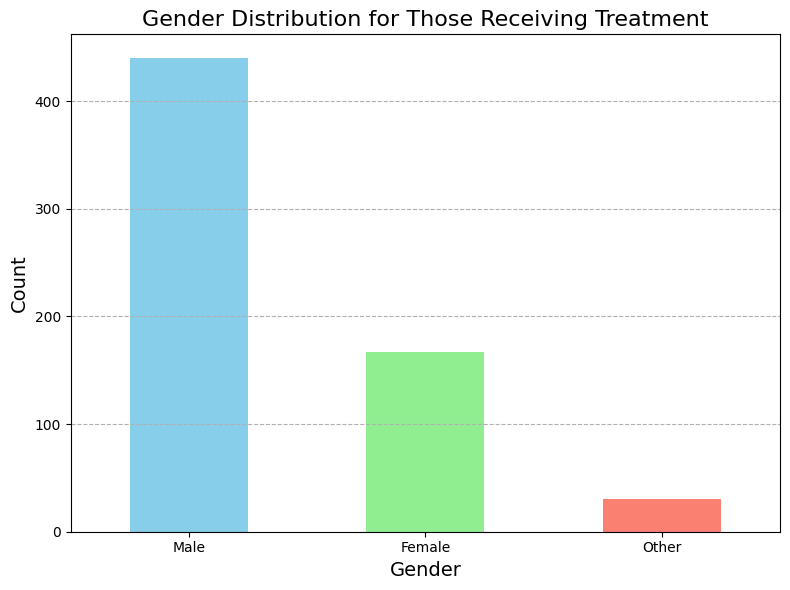

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Gender Distribution for Those Receiving Treatment', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

As we can see most frequent mental health issues are with Males

Identify the countries with the highest and lowest reported rates of mental health issues in the tech industry.


In [34]:
df_tech = df[(df['tech_company'] == 'Yes')*(df['treatment'] == 'Yes')]
print(df_tech)

                Timestamp  Age  Gender         Country state self_employed  \
0     2014-08-27 11:29:31   37  Female   United States    IL           NaN   
3     2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
6     2014-08-27 11:31:50   35  Female   United States    MI           NaN   
8     2014-08-27 11:32:39   42  Female   United States    IL           NaN   
10    2014-08-27 11:32:44   31    Male   United States    OH           NaN   
...                   ...  ...     ...             ...   ...           ...   
1250  2015-07-27 23:25:34   30    Male   United States    CA           Yes   
1252  2015-08-20 16:52:09   29    Male   United States    NC            No   
1254  2015-09-12 11:17:21   26    Male  United Kingdom   NaN            No   
1255  2015-09-26 01:07:35   32    Male   United States    IL            No   
1256  2015-11-07 12:36:58   34    Male   United States    CA            No   

     family_history treatment work_interfere    no_employees  .

In [35]:
countries = df_tech['Country'].value_counts()
countries

,count
Country,
United States,337
United Kingdom,67
Canada,24
Germany,17
Ireland,12
Australia,11
Netherlands,9
New Zealand,4
Poland,4


<Figure size 1200x600 with 0 Axes>

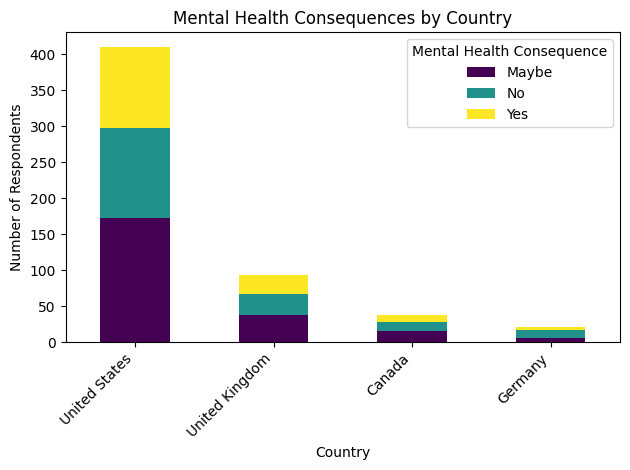

In [54]:
country_mental_health = df[df['treatment'] == 'Yes'].groupby(['Country', 'mental_health_consequence'])['mental_health_consequence'].count().unstack(fill_value=0)
country_mental_health['Total'] = country_mental_health.sum(axis=1)
country_mental_health = country_mental_health[country_mental_health['Total'] >= 20]
country_mental_health = country_mental_health.sort_values(by='Total', ascending=False)
country_mental_health = country_mental_health.drop('Total', axis=1)

plt.figure(figsize=(12, 6))
country_mental_health.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Mental Health Consequences by Country')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Mental Health Consequence')
plt.tight_layout()
plt.show()

US as a highest, China lowest with countries like Portugal, Denmark etc being close by frequence of mental health issues
Usually a bit less than 1/3rd of participants thinks that discussing a mental health issue with their employer would have negative consequences, other 1/3rd doesn't agree with the statement and the last group not sure.